In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier


In [3]:
file = r'C:\Users\ZBook\Desktop\juypter\dataset\winequality-red.csv'
df = pd.read_csv(file)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

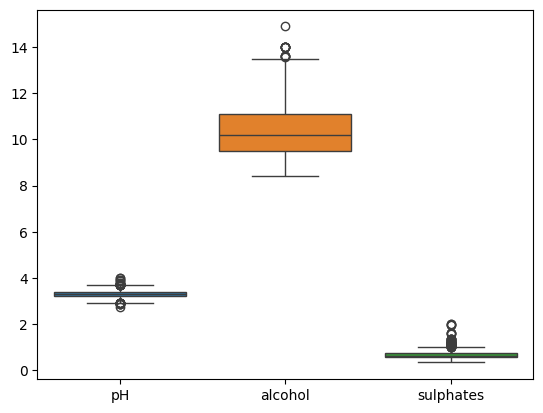

In [6]:
import seaborn as sns
sns.boxplot(data=df[['pH', 'alcohol', 'sulphates']])


In [7]:
df.skew()


fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [8]:
#  Feature Scaling
from sklearn.preprocessing import StandardScaler

features = df.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['quality'] = df['quality']


In [9]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [10]:
print("\nClass distribution:\n", df['quality'].value_counts())


Class distribution:
 quality
0    1382
1     217
Name: count, dtype: int64


In [11]:
X = df.drop('quality', axis=1)
y = df['quality']

In [12]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# ============================
# 3. Models & Results
# ============================

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n====== {name} ======")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


In [15]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
evaluate_model(log_reg, "Logistic Regression")


====== Logistic Regression ======
Accuracy: 0.8938
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



In [16]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
evaluate_model(rf, "Random Forest")


====== Random Forest ======
Accuracy: 0.9469
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       277
           1       0.96      0.63      0.76        43

    accuracy                           0.95       320
   macro avg       0.95      0.81      0.87       320
weighted avg       0.95      0.95      0.94       320



In [17]:
# SVM
svm_model = SVC(kernel='rbf', random_state=42)
evaluate_model(svm_model, "SVM")


====== SVM ======
Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.76      0.37      0.50        43

    accuracy                           0.90       320
   macro avg       0.84      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "KNN")


====== KNN ======
Accuracy: 0.8906
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.65      0.40      0.49        43

    accuracy                           0.89       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.88      0.89      0.88       320



In [20]:
# # XGBoost
# from xgboost import XGBClassifier 
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# evaluate_model(xgb, "XGBoost")

In [21]:
from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [23]:
y_pred = model.predict(X_test)

In [24]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.859375


In [25]:
#  normal distribution
#   continuous numeric variables.
#   GaussianNB needs numbers
#   works well for datasets with a few thousand rows

Accuracy (Linear SVM): 0.865625


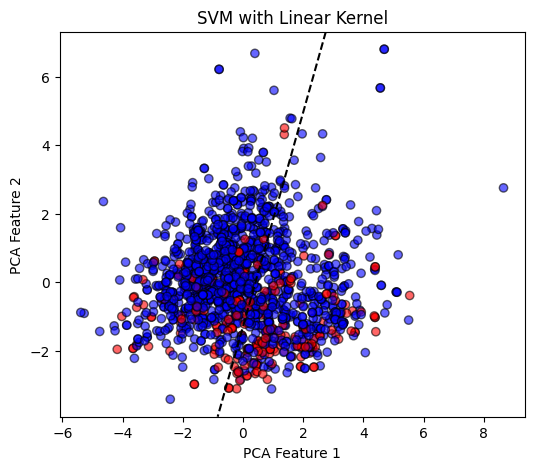

Accuracy (RBF SVM): 0.865625


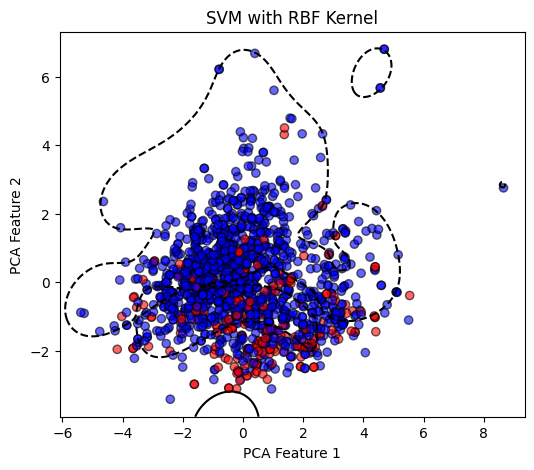

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 2. Scale + PCA for 2D
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Plot decision boundary function
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6, 5))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.show()

# 5. Linear SVM
model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
print("Accuracy (Linear SVM):", accuracy_score(y_test, y_pred_linear))
plot_decision_boundary(model_linear, X_2d, y, "SVM with Linear Kernel")

# 6. RBF SVM
model_rbf = SVC(kernel='rbf', C=1)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
print("Accuracy (RBF SVM):", accuracy_score(y_test, y_pred_rbf))
plot_decision_boundary(model_rbf, X_2d, y, "SVM with RBF Kernel")
